In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps #bibliothèque proposant densités, fonctions  de répartition, quantiles, etc... de lois usuelles.


Dans ce document, on donne quelques exemples d'applications du cours. On se servira des trois librairies ci-dessus. On peut déjà commencer par initialiser le générateur de nombres aléatoires :

In [2]:
np.random.seed(1234)

# Loi uniforme

Génerons maintenant un échantillon de 50 nombres uniformes sur $]0,1[$, calculons sa moyenne, sa variance et représentons son histogramme (et la densité cible :

0.5225428431272675
0.07187972860299881


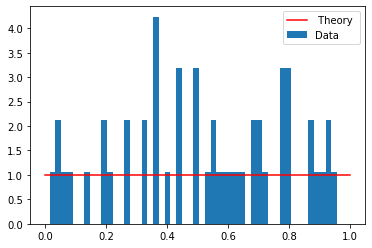

In [3]:
u = np.random.rand(50)
print(np.mean(u))
print(np.var(u))
x = np. linspace (0,1,100)
f_x = sps.uniform.pdf(x) #Densite uniforme
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

On augmente la taille de l'échantillon :

0.5139008431411258
0.08939613411009849


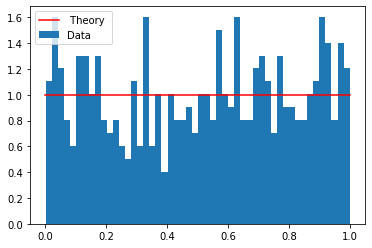

In [4]:
u = np.random.rand(500)
print(np.mean(u))
print(np.var(u))
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

Encore

0.48552465132260086
0.0856275002546009


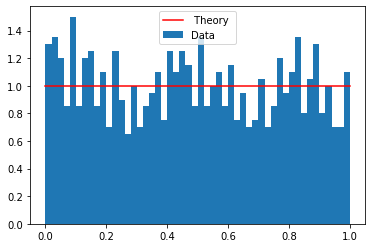

In [5]:
u = np.random.rand(1000)
print(np.mean(u))
print(np.var(u))
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

# Méthode d'inversion

## Loi exponentielle

On va transformer cet échantillon pour produire des réalisations de la loi exponentielle de paramètre $\lambda$ par la méthode d'inversion. Soit $X$ une variable aléatoire de loi exponentielle de paramètre $\lambda$. Sa fonction de répartition est donnée par :
$$F_X(x) = 1 - \exp(-\lambda x),~~x\in \mathbb{R}_+$$
Pour calculer son inverse, on résoud $u =  1 - \exp(-\lambda x)$. On trouve ainsi
$$x = -\frac{1}{\lambda}\log(1-u)$$
que l'on peut simplifier en
$$x = -\frac{1}{\lambda}\log(u)$$
puisque si $U\sim \mathcal{U}_{]0,1[}$, alors $1-U \sim \mathcal{U}_{]0,1[}$.

Pour générer un échantillon de réalisations de la loi exponentielle de paramètre $\lambda$, on applique donc cette transformtion à un échantillon de réalisations de la loi uniforme sur $]0,1[$.

In [6]:
param = 1
y = -1/param * np.log(np.random.rand(1000))

De même, on peut réprésenter son histogramme et y superposer la densité exponentielle

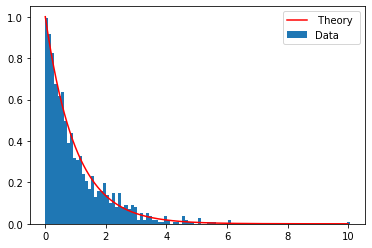

In [7]:
x = np. linspace (0,10,1000)
f_x = sps.expon.pdf(x) #Densite exponentielle
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

En pratique, on utilisera plutôt les fonctions internes de numpy pour simuler des réalisations selon les lois usuelles. Voir :

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html

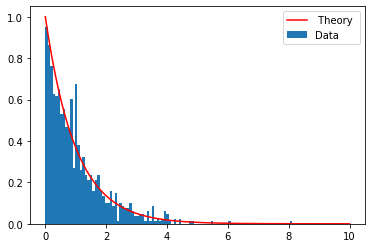

In [8]:
x = np. linspace (0,10,1000)
f_x = sps.expon.pdf(x) #Densite exponentielle
y = np.random.exponential(param,1000)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

## Une loi discrète

On illustre ici l'application de la méthode d'inversion pour la simulation d'une loi discrète. Soit $X$ une v.a.r. de loi :
$$\mathbb{P}(X=x) = \left\{\begin{array}{ll}
        1/2 & \text{ si }x = 1 \\
        1/4 & \text{ si }x = 2 \\
        1/4 & \text{ si }x = 3 \\
        0 & \text{ sinon}
        \end{array}
        \right.$$
On commence par calculer les valeurs non triviales prises par sa fonction de répartition, puis on transforme les variables uniformes comme suit :

[0.5  0.75 1.  ]


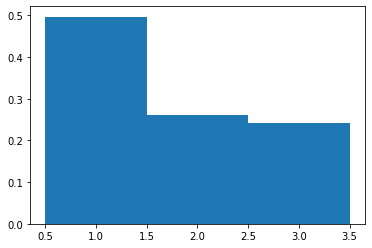

In [9]:
n=1000
p = np.cumsum([1/2,1/4,1/4])
u = np.random.rand(n)
print(p)
y = 1.*(u<p[0]) + 2.*(p[1]>u)*(u>p[0]) +3.*(u>p[1])
d = np.diff(np.unique(y)).min()
left_of_first_bin = y.min() - float(d)/2
right_of_last_bin = y.max() + float(d)/2
plt.hist(y, np.arange(left_of_first_bin, right_of_last_bin + d, d),density = True)
plt.show()

On peut alors s'en servir pour simuler, par exemple, selon un mélange des gaussiennes : $\mathcal{N}(0,1)$, $\mathcal{N}(5,1/2)$ et $\mathcal{N}(8,4)$, chacune associée à une des modalités de $X$.

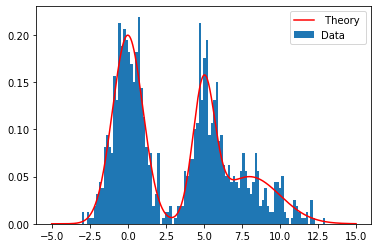

In [10]:
z = (y==1)*np.random.normal(0,1,n) + (y==2)*np.random.normal(5,np.sqrt(.5),n) + (y==3)*np.random.normal(8,np.sqrt(4),n)
x = np. linspace (-5,15,n)
f_x = .5*sps.norm.pdf(x) + .25*sps.norm.pdf(x,loc =5, scale = np.sqrt(.5)) + .25*sps.norm.pdf(x,8,np.sqrt(4)) #Densite du melange
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(z,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

# Méthode de rejet

La loi de Wigner (ou du demi-cercle) est la loi de support $[−2, 2]$ et de densité $f(x) = \frac{1}{2\pi}\sqrt{4 - x^2}$.
Pour simuler selon une densité $f$ à support compact $C$, le plus simple est d'utiliser une loi uniforme sur ce même compact comme densité instrumentale et de prendre $\sup_{x\in C}f(x)$ comme constante pour la majoration (en ignorant la constante de normalisation de l'uniforme 1/|C|).
Ici cette constante vaut $1/\pi$.

In [11]:
n = 1000 #taille de l'échantillon

# densité de Wigner
def dwigner(x):
    return (1/(2*np.pi))*np.sqrt(4-x**2)
    
a = 1/np.pi    
k = 0
y = np.empty([n,1])
while k < n:
    u = np.random.uniform(-2,2,1)
    v = np.random.rand(1)
    if v*a < dwigner(u):
        y[k] = u
        k = k+1

Représentation graphique

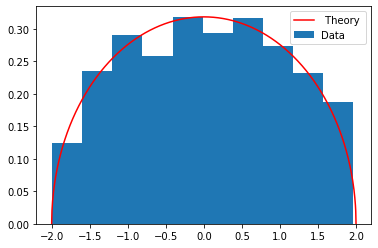

In [12]:
x = np. linspace (-2,2,1000)
f_x = dwigner(x)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

# Echantillonnage d'importance

On cherche à évaluer l'espérance d'une variable aléatoire $X$ gaussienne centrée réduite (de densité $f_X$ et de f.d.r. $F_X$) sachant qu'elle dépasse la valeur 3. La densité conditionnelle s'écrit :

$$f_{X|X > 3}(x) = \frac{f_x(x)}{1-F_X(3)}1_{]3,+\infty[}(x)$$

et on veut estimer :

$$\mathbb{E}(X|X>3) = \int_{\mathbb{R}} x f_{X|X > 3}(x) dx$$

Si on implémente une méthode de rejet de manière naïve --- on tire des gaussiennes centrées réduites et on ne conserve que celles effectivement supérieures à 3 pour calculer l'espérance --- le taux de rejet vaut :

In [13]:
1-sps.norm.cdf(3)

0.0013498980316301035

C'est donc peu efficace. 

On va donc tirer selon une loi instrumentale qui va mieux cibler la région d'intérêt, par exemple une gaussienne d'espérance 3 et de variance 1 (de densité notée $g$) et on utilisera alors l'estimateur :

$$\frac{\sum_{i=1}^{n}w_ih(X_i)}{\sum_{i=1}^n w_i}$$

avec les poids d'importance $w_i = \frac{f_{X|X > 3}(X_i)}{g(X_i)}$.

In [14]:
def dnormcond(x,s): ### densité conditionnelle
    return sps.norm.pdf(x)/(1.-sps.norm.cdf(s))*(x>s)

n = 100000

y = np.random.normal(3,1,n)

w = dnormcond(y,3)/sps.norm.pdf(y,3,1)

m = np.sum(w*y)/sum(w)

m


3.2843787645626614

On peut représenter l'histogramme de l'échantillon pondéré (le poids $w_i$ est affecté à chaque simulation dans le calcul de l'histogramme) et le comparer à $f_{X|X > 3}(x)$

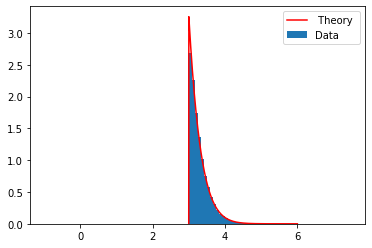

In [15]:
x = np. linspace (3,6,1000)
f_x = dnormcond(x,3)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,density=True, bins = 100, weights=w, label = "Data")
plt.legend(loc="best")
plt.show()